In [47]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from collections import defaultdict
from statistics import mean
import numpy as np
from scipy.optimize import curve_fit

# Experiment 1 and 2

In [30]:
green = dict(x=[], y=[])
green_scale = []
red = dict(x=[], y=[])
red_scale = []
blue = dict(x=[], y=[])
blue_scale = []
red_scale = []
freqs2 = []
sample_number = 2
center = 434
for j in range(7):
    with open(f'RO_locations_random{j}.json') as f:
        locations = json.load(f)
    data = pd.read_pickle(f'par/ALL_3_Stage_128_Osc_rand_{j}.pkl')
    for i in locations.keys():
        freqs2.append(data[f'RO{i}'].loc[sample_number])
        if data[f'RO{i}'].loc[sample_number] < center:
            green['x'].append(locations[i][0])
            green['y'].append(locations[i][1])
            green_scale.append(1*(data[f'RO{i}'].loc[sample_number] - 250))
        elif center < data[f'RO{i}'].loc[sample_number] < 460:
            blue['x'].append(locations[i][0])
            blue['y'].append(locations[i][1])
            blue_scale.append(1*(data[f'RO{i}'].loc[sample_number] - 250))
        else:
            red['x'].append(locations[i][0])
            red['y'].append(locations[i][1])
            red_scale.append(1*(data[f'RO{i}'].loc[sample_number] - 250))

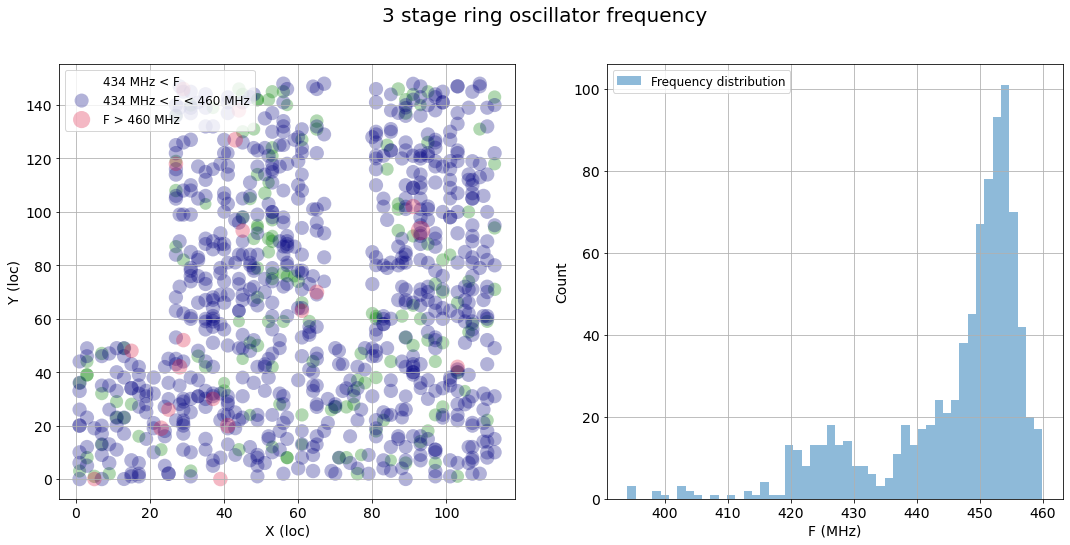

In [37]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18, 8))
#fig = plt.figure(figsize=(12,9))
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
ax.scatter(green['x'], green['y'], c='green', s=green_scale, label=f'{center} MHz < F', alpha=0.3, edgecolors='none')
ax.scatter(blue['x'], blue['y'], c='navy', s=blue_scale, label=f'{center} MHz < F < 460 MHz', alpha=0.3, edgecolors='none')
ax.scatter(red['x'], red['y'], c='crimson', s=red_scale, label='F > 460 MHz', alpha=0.3, edgecolors='none')
ax.set_xlabel('X (loc)')
ax.set_ylabel('Y (loc)')

#plt.title('Arash Data')
ax.legend(loc=2)
ax.grid(True)

ax2.hist([i for i in freqs2 if i < 460], 50, alpha=0.5, label='Frequency distribution')
ax2.grid(True)
ax2.set_xlabel('F (MHz)')
ax2.set_ylabel('Count')
ax2.legend(loc=2)
fig.suptitle('3 stage ring oscillator frequency')
plt.savefig('Frequency_distribution.png')
plt.show()


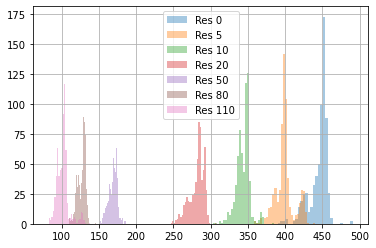

In [84]:
freqs2 = defaultdict(lambda: [])
sample_number = 2
mean_list = []
for resolution in [0, 5, 10, 20, 50, 80, 110]:
    for j in range(5):
        data = pd.read_pickle(f'RO_resolution_{resolution}_num_{j}.pkl')
        for i in range(4):
            freqs2[resolution] += data[[f'RO{i}_{k}' for k in range(32)]].iloc[sample_number].tolist()
    plt.hist([x for x in freqs2[resolution] if (x < mean(freqs2[resolution])+ 50 and mean(freqs2[resolution]) - 80 < x)], 30, alpha = 0.4, label=f'Res {resolution}')
    mean_list.append(mean(freqs2[resolution]))
plt.legend()
plt.grid(True)

In [85]:
len(freqs2[resolution])

640

In [86]:
def f(x, A, B): 
    return A*x+B

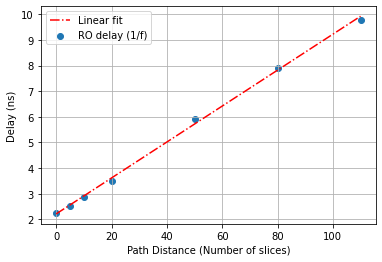

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
popt, pcov = curve_fit(f, [0, 5, 10, 20, 50, 80, 110], [1000/t for t in mean_list]) # your data x, y to fit
ax.plot([0, 5, 10, 20, 50, 80, 110], f(np.array([0, 5, 10, 20, 50, 80, 110]), popt[0], popt[1]), '-.r', label='Linear fit')
ax.scatter([0, 5, 10, 20, 50, 80, 110], [1000/t for t in mean_list], label='RO delay (1/f)')
ax.set_ylabel('Delay (ns)')
ax.set_xlabel('Path Distance (Number of slices)')
ax.legend()
ax.grid(True)

In [95]:
popt

array([0.07015683, 2.2102382 ])